<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/main/notebooks/Python_chapter_ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習: ニューラルネットワークの概要

AI・機械学習などと称されるデータ分析手法・アルゴリズムの多くは
「入力データと出力データ間の非自明な関係を人工ニューラルネットワーク(Artificial Neural Networkm, ANN)と呼ばれる、ネットワーク構造を持つ関数によって模倣する」点が本質的である。

生物の神経回路網を模倣したANNの歴史は古く、遡ると1940年代頃から研究されている一方、
「ブームを迎えてはしばらくして下火になる」ということを二回ほど繰り返してきた歴史もある。
:::{margin} ディープラーニング
授業でも説明するように、ディープラーニング(深層学習)とは、ニューラルネットワークの層構造が深いアーキテクチャを利用したモデルを指しますが、
一大分野となった経緯もあり、どこからが"ディープ"なのかについては、広義・狭義、さまざまな定義が混在しています。
:::
2000年代になり、計算機の発展やアルゴリズムの改良も手伝い、それまで計算量やデータの準備・処理上の問題で
現実的でなかった様々なタスク(音声・画像・自然言語などにおける処理やパターン認識等)に対して
ANN及びそれを拡張したモデルが高い性能を発揮することがわかり、数多くの成功を収めるとともに、
2010年前後にはディープラーニングと称される一分野を形成するに至った。

ANNは(この文章を初めて書いた)2022年時点においてもその勢いはとどまることを知らず、
様々な学術分野だけでなく、社会や産業にも浸透し、スマートフォンのカメラなど身近なところでも当たり前のように応用されている。
皆さんのお手元にスマートフォンがあれば、
- 画像認識技術を用いた認証システム (例:端末のロックを解除したり写真に写ったものと類似の商品を調べる)
- 画像生成技術を用いた写真の補正 (例:写真に写り込んだ人を消す)
- 自然言語処理を用いた翻訳・対話・botサービス (例:アシスタント系アプリや翻訳、自動音声)

といったことを当たり前のようにやってのけるハード・ソフト/Webサービス等が既にあるのをご存知だろう。

さらに、2023年、画像や動画・音声、自然言語処理などのタスクを高い精度でこなす生成AIの対等が社会に大きなインパクトを覚えた。
これらの背景にあるのも、ニューラルネットワークの発展形である。


この授業では、機械学習手法の根幹を支えるニューラルネットワークについて、基本的な動作原理を理解することを目標に、主に3層(入力層・隠れ層・出力層)からなる最も単純な構造を持ったニューラルネットワークを題材として説明を行う。
単純なモデルに注目して理解しておくことは、皆さんが機械学習分野の基礎(理論)あるいは応用に際してより複雑なアーキテクチャを仕様・理解する上での基礎となるはずだ。


## パーセプトロン

まず、ニューラルネットワークの基本的な要素となるパーセプトロン(Perceptron)を紹介する。
パーセプトロンは1957年に考案された模型で、ニューラルネットワークの一種(特殊な場合)とみなせる。

下図のように、あるノード(節)に注目した際、そのノードに$n$個の入力信号があり、一つの値を出力するケースを考える。

![](../pic/perceptron.png)


便宜上、入力信号の数を$n$とし、それぞれの入力信号を$x_1,x_2,...,x_n$のように$n$成分を持つベクトルの各成分のように書くことにする。
また、入力信号を"受け取る"重みを$w_1,w_2,...,w_n$のように書くことにする。
重みは、入力信号の重要度を表すパラメータであり、重みが大きいほどその入力信号の重要度が高いことを意味する。

このとき、今注目しているノードに対する全入力信号$X$は、$X=x_1w_1+x_2w_2+...+x_nw_n$あるいはベクトルの内積として$X=\boldsymbol{w} \cdot \boldsymbol{x}$と書くことができる。
この$X$の値がある閾値(しきい値,threshold)$\theta$を超えた場合に、ノードの出力$z$は$1$、超えなかった場合には$0$となる、と約束する。
式で書くと、

$$
z = \begin{cases}
1 & (X \ge \theta) \\
0 & (X < \theta)
\end{cases}
$$

となる。この関数は、ある種の信号伝達を担う"関所"のようなものになっていて、
「自身への入力信号の重み付き和がある値を超えた場合にのみ、次のノードに信号を伝達する」という働きをする。

適当に$\theta=2.0$として、コードでプロットしてみよう

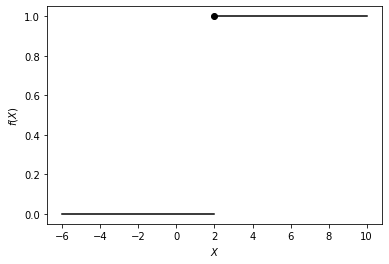

In [8]:
import matplotlib.pyplot as plt

def plot_stepfunc(theta=2.0):
    fig = plt.figure()
    plt.scatter(2,1,marker="o",color="k")
    plt.plot([-6,2],[0, 0],color="k")
    plt.plot([2,10],[1, 1],color="k")
    plt.ylabel("$f(X)$")
    plt.xlabel("$X$")
    plt.show()
    plt.close()

plot_stepfunc()

このようなノードをパーセプトロンと呼ぶ。
ノードの出力は0か1の離散的な2値をとるため、True/Falseのような真偽値とみなすこともできる。

入出力の具体的な例として、100×100ピクセルの画像を入力として受け取り、その画像が犬の画像であるかどうかを判定するパーセプトロンを考える。
各ピクセルの画素値を10000成分を持つベクトルの成分とみなし$x_1,x_2,...,x_{10000}$とし、
それぞれの入力に対する重みを$w_1,w_2,...,w_{10000}$とする。このとき、パーセプトロンの出力は、

$$
z = \begin{cases}
1 & (x_1w_1+x_2w_2+...+x_{10000}w_{10000} \ge \theta) \\
0 & (x_1w_1+x_2w_2+...+x_{10000}w_{10000} < \theta)
\end{cases}
$$

となり、重みと閾値の値を"うまく調整してやれば"、与えられた画像が犬の画像かどうかの判定ができると**原理的には**考えられる。

だが実際には「各ピクセルの画素値の重み付き和」が閾値を超えるかどうかで判定するというのは、
画像の特徴を捉えるのにはあまり適していないと予想ができる。
なぜなら、例えば犬の画像の場合、犬の画像の特徴は画像の中のどこにあるかによっても異なるし、
犬が写っているかを判断する上では、上下左右に隣り合うピクセル同士の関係なども重要になるのに対して、
上記のようなパーセプトロンでは、各ピクセルの画素値の重み付き和しか見ていないからである。



## ニューラルネットワーク: 全結合

次にニューラルネットワークの最も単純な例として、全結合のニューラルネットワークを紹介する。
全結合のニューラルネットワークは、パーセプトロンのノードを層状に並べたもので、
隣り合う層のノード間には全て結合があるというものである。
図で見るほうがはやいので以下に示そう。

![](../pic/neuralnetworks.png)

上のパーセプトロンのように、1つのノードに着目してみよう。
ニューラルネットワークの各ノードで行う操作は、
1. 入力信号$x$の重み付き和を計算し、バイアス項$b$を加える
2. 重み付き和＋バイアスを活性化関数$g$に入力して、活性化関数の出力を計算する
3. 出力を次の(下流の)ノードに伝達する

という3つになる。この内、パーセプトロンを"より拡張した"考え方が1.と2.に含まれている。
あるノードに対する入力が$x$、重みが$w$(それぞれ長さ$n$のベクトルとする)、バイアスが$b$で与えられているとき、上の操作を式で書くと、

$$
u = g \left(\sum_{i=1}^n w_ix_i + b \right)
$$

となる。

1.の重み付き和を計算する部分は、パーセプトロンと同じである。
バイアス(bias)は、各ノードにおいて、入力信号に対して計算された重み付き和に各ノード固有の定数を加えることに対応している。
:::{margin}
例えば、ある$x$に関する直線を表すのに$f(x)=ax+b$などとするが、この切片に対応するものをイメージするとよい。
バイアス項が無い、というのは「バイアス$b$が0である特殊な場合」に相当するため、バイアス項を導入するのは、極めて自然な拡張や一般化と言える。
:::

実際には、ノードや層が複数定義されているため、より正確に式で書くと以下のようになる:
第$l$層の$k$番目のノードに着目した際の出力を$z_k^{(l)}$と表記することにすると、

$$
\begin{aligned}
u_k^{(l)} & = \sum_{i=1}^{n_{l-1}} w_{ki}^{(l)}z_i^{(l-1)} + b_k^{(l)}\\
z_k^{(l)} & = g(u_k^{(l)})
\end{aligned}
$$
と書くことができる。
単一のノードに着目するのではなく、単一の層に着目する表記に直すには
$l$層のノードの数$n_{l}$を用いて、各ノードの出力をベクトルの成分、重みを行列の成分として表記するとよい:

$$
\begin{aligned}
\boldsymbol{u}^{(l)} &= \boldsymbol{W}^{(l)}\boldsymbol{z}^{(l-1)} + \boldsymbol{b}^{(l)}\\
\boldsymbol{z}^{(l)} &= g(\boldsymbol{u}^{(l)})
\end{aligned}
$$

それぞれの重み $W^{(l)}$ は、ノードへの入力の次元(= $n_{l-1}$)×ノードからの出力の次元(= $n_{l}$)を持つ行列である。
各ノードで行なう $Wz + b$ の計算は、線形変換と平行移動に相当する演算で、より一般にはAffine変換と呼ばれる。このことから、全結合ニューラルネットワークのことをAffine Layerなどと呼ぶこともある。

2.の操作に現れた活性化関数については、後で詳しく述べるが、
入力の重み付き和(+バイアス)に対して、非線形な関数を適用することで、
より複雑な関数を表現することができるようになる。
**パーセプトロンは、この活性化関数が単純なステップ関数である場合に相当**する。

パーセプトロンと上のニューラルネットワークの大きな違いは、構造や一般化(バイアス・活性化関数)はもちろんだが、
各ノードの出力が0か1の2値ではなく任意の実数をとりうる(つまり出力の値も一般化している)ことである。
これにより、最終的な出力を2値だけに限定することなく、
より複数の"クラス"に対する真偽値を判定する、あるいは連続値を出力しクラスに属する"確率"を計算する、
ピクセルの画素値を推定する、といった、より複雑な出力に対応することができる。

ニューラルネットワークにおける**訓練**あるいは**学習**とは、入力データを用いて、出力と**正解**の差を最小化するように、
各ノードの重みやバイアスを調整(≒最適化)することと言い換えられる。


## 活性化関数

次に、活性化関数について説明する。
ニューラルネットワークのノードにおいて、重み付き和(+バイアス)に対して適用する関数を活性化関数と呼ぶ。
パーセプトロンの場合は、活性化関数はステップ関数であったが、
ニューラルネットワークでは、ステップ関数以外の様々な関数が用いられる。


活性化関数には、例えば以下のようなものがある:
- シグモイド関数  
    $g(u) = \frac{1}{1 + \exp(-u)}$
- Tanh関数  
    $g(u) = \frac{\exp(u) - \exp(-u)}{\exp(u) + \exp(-u)}$
- ReLU関数  
    $g(u) = \max(0, u)$    
    Softplus, Leaky ReLU, ELUなどその他にも派生を持つ
- 恒等関数(回帰問題の出力層で用いる。)
    $g(u) = u$
- ソフトマックス関数  
    主に分類問題において、各クラスに属する確率を出力するために用いられる       
    $g(u) = \frac{\exp(u)}{\sum_{i=1}^n \exp(u_i)}$

活性化関数は、ニューラルネットワークの学習において重要な役割を果たす。
入力と出力の間の一般には非線形な関係を表現するために用いられ、
タスクに応じて、予測精度の高い適切な活性化関数を選択することが重要である。

:::{margin} 勾配消失
詳しくは「誤差逆伝播法」の資料で説明するが、ニューラルネットワークの学習の際、
重みパラメータなどを調整するために、各ノードの出力に対する誤差の勾配を計算する必要がある。
その際、入力側に近い上流側の層で勾配の値が小さくなり、パラメータの学習(モデルの精度の改善)が進まなくなることがある。
:::
例えば上のReLU関数は、近年の深層学習モデルの中でも最もよく利用されている活性化関数の1つである。
ReLUには、勾配の計算が自明なことによる計算量的利点と、**勾配消失**の問題を低減する効果があるため、
画像認識などネットワークの構造が"深い"ニューラルネットワークで効率的に学習をすすめるために採用されることが多い。


### 活性化関数の役割

活性化関数の役割について1つ注を添えておこう。
例えば、3層のニューラルネットワークを用いて、単純な回帰問題を解く、つまり
$\boldsymbol{y}=f(\boldsymbol{x})$という"真の関数"をニューラルネットワークの出力$f^{NN}(\boldsymbol{x})$を用いて近似することを考える。
表式を簡素にするため、各ノードでのバイアス項を省略して考えることにすると、
上記のようなニューラルネットワークは、以下のように表せる。

$$
f^{NN}(\boldsymbol{x}) = g_2(\boldsymbol{w_2}  g_1(\boldsymbol{w_1} \boldsymbol{x}))
$$

この場合、対象となる問題は回帰問題に分類されるため、出力層における活性化関数$g_2$は恒等関数を用いる。
では、隠れ層における活性化関数$g_1$を上のようなTanhやReLUではなく恒等関数を用いた場合、何が起こるだろうか？

この場合のニューラルネットワークの出力は

$$
f^{NN}(\boldsymbol{x}) = \boldsymbol{w_2}  \boldsymbol{w_1}  \boldsymbol{x}
= (\boldsymbol{w_2}  \boldsymbol{w_1}) \boldsymbol{x}
$$

となり、層を繰り返すことによって得られる信号の変換は単なる行列の積となり、
単一の行列$W=w_1 \times w_2$による線形変換になってしまう。

つまり、隠れ層の活性化関数を恒等関数にすると、いくら隠れ層を増やしても
線形変換による近似しかできないため、ニューラルネットワークの表現力が制限されてしまう。
入力と出力の間の非線形な関係を表現するためには、隠れ層において非線形な活性化関数を用いる必要があることがわかる。